In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# SELECT TOP 1 date from Measurement
# ORDER BY date DESC;
# a = engine.execute("SELECT date from Measurement ORDER BY date DESC limit 1;")
# print(a)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23ec1c0c748>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

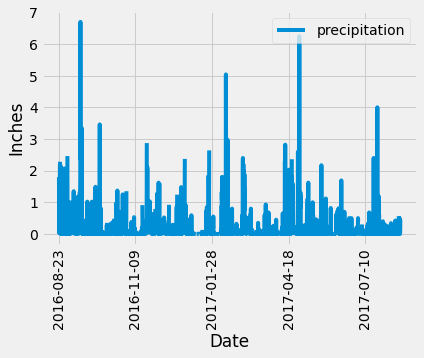

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores

a = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
b = pd.DataFrame(a)

df = b.rename(columns={0: "Date", 1: "prcp"})
df

# Sort the dataframe by date

df.sort_values(by=['Date'], inplace=True)
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot("Date","prcp")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(['precipitation'],loc=1)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
available_stations = session.query(Measurement.station).distinct().count()
available_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

most_active_station=active_stations[0][0]
most_active_station

'USC00519281'

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# select MIN(tobs),MAX(tobs),MEAN(tobs) from Measurement
# WHERE Measurement.station = most_active_station

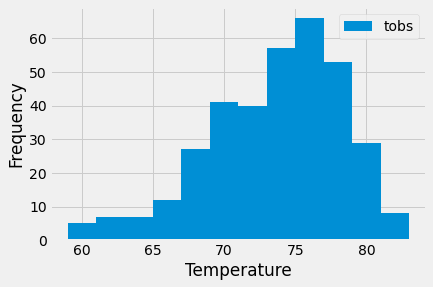

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_observation = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == most_active_station)
temperature_observation_df = pd.DataFrame(temperature_observation, columns=['tobs'])


x = temperature_observation_df["tobs"]


plt.hist(x, bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(['tobs'],loc=1)
plt.show() 



# Close Session

In [18]:
# Close Session
session.close()